#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.
 
### CHAPTER 12
**CH12 Returns on a company stock and market returns**

version 1.0 2021-05-31
 
 

In [1]:
import os
import sys
import warnings
from datetime import datetime

import numpy as np
import pandas as pd
import pyfixest as pf
from arch.unitroot import PhillipsPerron
from mizani.breaks import date_breaks
from mizani.formatters import date_format
from mizani.formatters import percent_format
from plotnine import *

warnings.filterwarnings("ignore")


In [2]:
current_path = os.getcwd()
base_dir = current_path.split("da_case_studies")[0]
data_in = os.path.join(str(base_dir), "da_data_repo/stocks-sp500/raw/")
data_out = os.path.join(str(base_dir), "da_data_repo/stocks-sp500/clean/")
output = os.path.join(str(base_dir), "da_case_studies/ch12-stock-returns-risk/output/")
func = os.path.join(str(base_dir), "da_case_studies/ch00-tech-prep/")
sys.path.append(func)


In [3]:
from py_helper_functions import *


In [4]:
stock_data = pd.read_csv(os.path.join(data_in, "ready_sp500_45_cos.csv"))
#stock_data = pd.read_csv("https://osf.io/download/4pgrf/")



In [5]:
stock_data.head()


,ticker,ref.date,price.open,price.close,price.adjusted,price.low,price.high,volume
0,ACN,2001-07-19,15.10,15.17,11.497672,15.00,15.29,34994300.0
1,ACN,2001-07-20,15.05,15.01,11.376402,14.80,15.05,9238500.0
2,ACN,2001-07-23,15.00,15.00,11.368821,14.55,15.01,7501000.0
3,ACN,2001-07-24,14.95,14.86,11.262713,14.70,14.97,3537300.0
4,ACN,2001-07-25,14.70,14.95,11.330926,14.65,14.95,4208100.0


In [6]:
MSFT = stock_data[stock_data["ticker"] == "MSFT"]


In [7]:
p_MSFT = (
    MSFT[["ref.date", "price.close"]]
    .rename(columns={"ref.date": "date"})
    .reset_index(drop=True)
)


In [8]:
p_MSFT["date"] = pd.to_datetime(p_MSFT["date"])


In [9]:
p_MSFT.head()


,date,price.close
0,1997-12-29,15.789063
1,1997-12-30,16.281250
2,1997-12-31,16.156250
3,1998-01-02,16.390625
4,1998-01-05,16.296875


In [10]:
sp500_index = pd.read_csv(os.path.join(data_in, "ready_sp500_index.csv"))


In [11]:
p_SP500 = (
    sp500_index[["ref.date", "price.close"]]
    .rename(columns={"ref.date": "date"})
    .reset_index(drop=True)
)


In [12]:
p_SP500["date"] = pd.to_datetime(p_SP500["date"])


In [13]:
data_daily = (
    pd.merge(p_SP500, p_MSFT, how="inner", on="date")
    .rename(columns={"price.close_x": "p_SP500", "price.close_y": "p_MSFT"})
    .reset_index(drop=True)
)


In [14]:
data_daily = data_daily[
    (data_daily["date"] >= "1997-12-31") & (data_daily["date"] <= "2018-12-31")
]


In [15]:
data_daily["year"] = data_daily["date"].dt.year


In [16]:
data_daily["month"] = data_daily["date"].dt.month


In [17]:
# data_daily.to_csv(os.path.join(data_out,"stock-prices-daily.csv"))


In [18]:
# PART I: Graphs


In [19]:
data_daily["lnp_MSFT"] = data_daily["p_MSFT"].map(lambda x: np.log(x))


In [20]:
data_daily["lnp_SP500"] = data_daily["p_SP500"].map(lambda x: np.log(x))


In [21]:
limits = datetime(1998, 1, 1), datetime(2018, 1, 1)


In [22]:
breaks = date_breaks("2 year")


### Figure 12.2 Stock prices, daily time series

For time series data, plotnine wants the index to start from 0

In [23]:
data_daily = data_daily.reset_index(drop=True)

(a) Microsoft

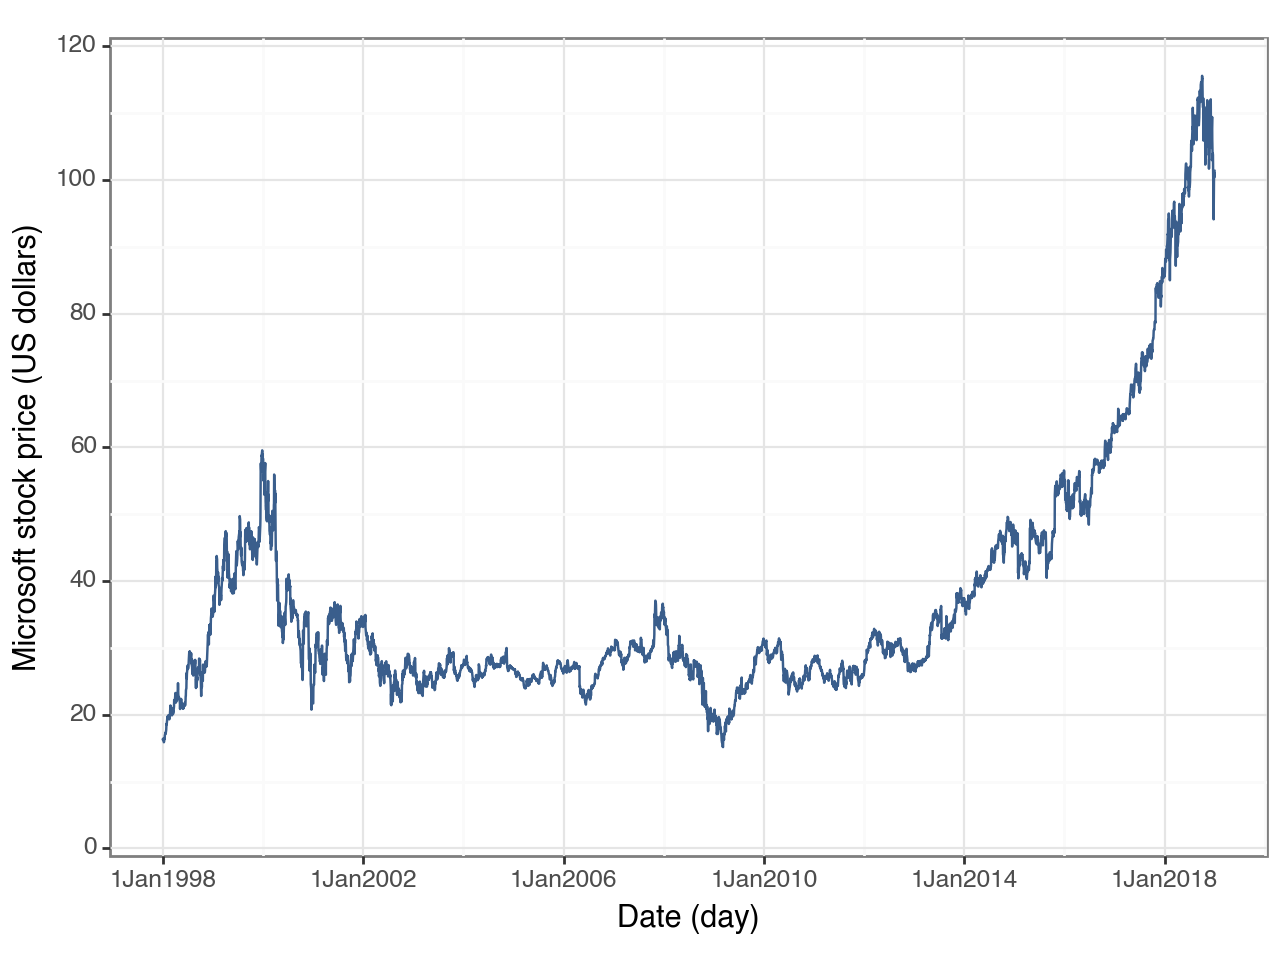

<Figure Size: (640 x 480)>

In [24]:
(
    ggplot(data_daily)
    + geom_line(aes("date", "p_MSFT"), color=color[0], size=0.5)
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 120], breaks=seq(0, 120, 20))
    + scale_x_date(breaks=breaks(limits)[::2], labels=date_format("1%b%Y"))
    + labs(y="Microsoft stock price (US dollars)", x="Date (day)")
    + theme_bw()
)


(b) S&P500 index

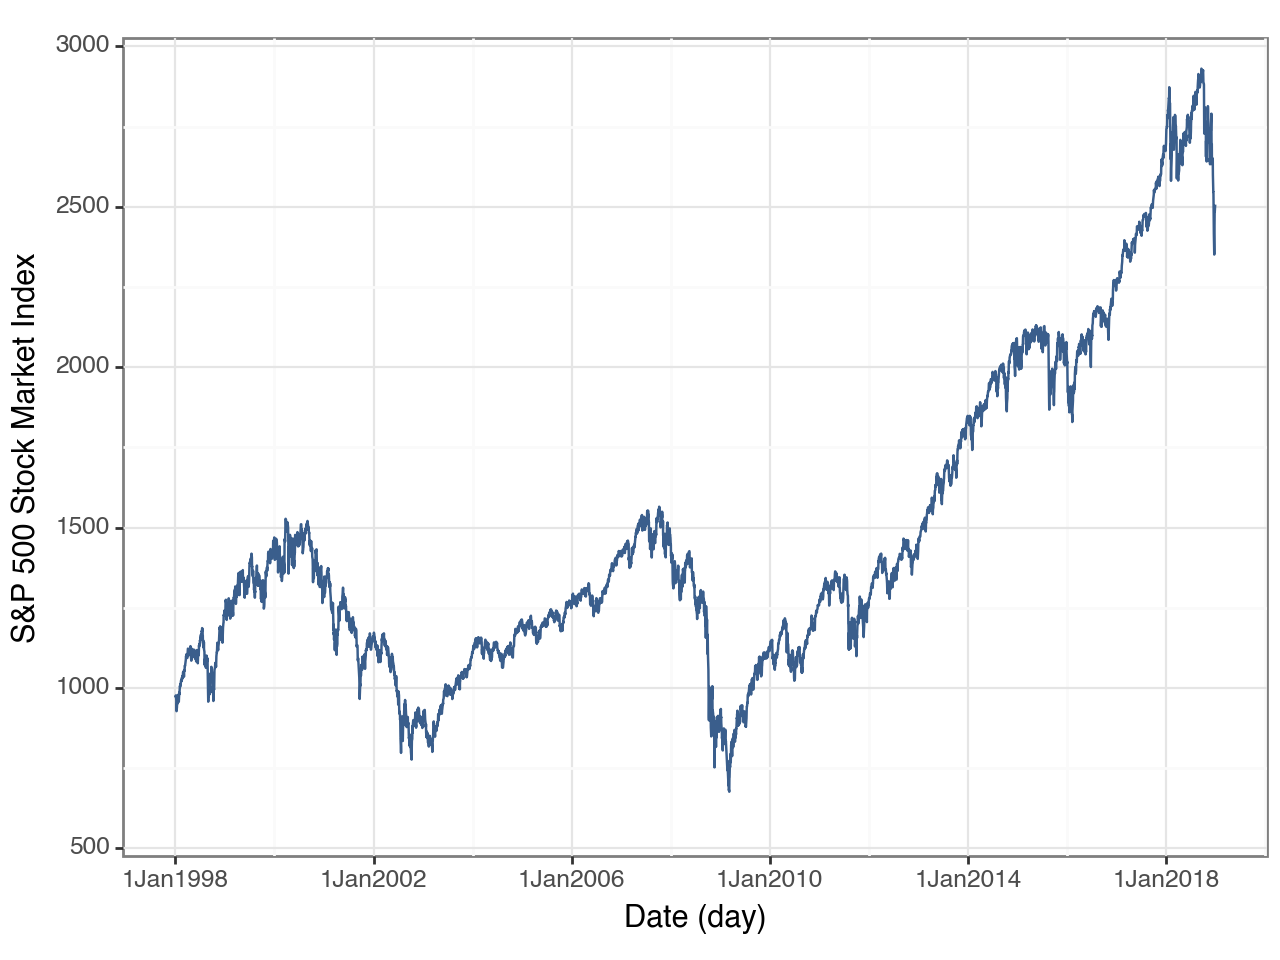

<Figure Size: (640 x 480)>

In [25]:
(
    ggplot(data_daily)
    + geom_line(aes("date", "p_SP500"), color=color[0], size=0.5)
    + scale_y_continuous(
        expand=[0.01, 0.01], limits=[500, 3000], breaks=seq(500, 3000, 500)
    )
    + scale_x_date(breaks=breaks(limits)[::2], labels=date_format("1%b%Y"))
    + labs(y="S&P 500 Stock Market Index", x="Date (day)")
    + theme_bw()
)


In [26]:
print(PhillipsPerron(data_daily["p_MSFT"], lags=32, test_type="rho", trend="n"))
print(PhillipsPerron(data_daily["p_MSFT"], lags=32, test_type="rho", trend="c"))
print(PhillipsPerron(data_daily["p_MSFT"], lags=32, test_type="rho", trend="ct"))


     Phillips-Perron Test (Z-rho)    
Test Statistic                  2.287
P-value                         0.994
Lags                               32
-------------------------------------

Trend: No Trend
Critical Values: -13.24 (1%), -7.79 (5%), -5.54 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                  2.245
P-value                         0.998
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -20.60 (1%), -14.08 (5%), -11.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -0.092
P-value                         0.995
Lags                               32
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.31 (1%),

In [27]:
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="n"))
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="c"))
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="ct"))


     Phillips-Perron Test (Z-rho)    
Test Statistic                  0.908
P-value                         0.892
Lags                               32
-------------------------------------

Trend: No Trend
Critical Values: -13.24 (1%), -7.79 (5%), -5.54 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -0.292
P-value                         0.940
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -20.60 (1%), -14.08 (5%), -11.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -3.943
P-value                         0.894
Lags                               32
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.31 (1%),

In [28]:
data_daily["l.p_MSFT"] = data_daily["p_MSFT"].shift()
data_daily["l.p_SP500"] = data_daily["p_SP500"].shift()
data_daily["d.p_MSFT"] = data_daily["p_MSFT"] - data_daily["l.p_MSFT"]
data_daily["d.p_SP500"] = data_daily["p_SP500"] - data_daily["l.p_SP500"]
data_daily["PctRetMSFT"] = data_daily["d.p_MSFT"] / data_daily["l.p_MSFT"] * 100
data_daily["PctRetSP500"] = data_daily["d.p_SP500"] / data_daily["l.p_SP500"] * 100


In [29]:
data_daily["d.lnp_MSFT"] = np.log(data_daily["p_MSFT"]) - np.log(
    data_daily["p_MSFT"].shift()
)
data_daily["d.lnp_SP500"] = np.log(data_daily["p_SP500"]) - np.log(
    data_daily["p_SP500"].shift()
)


In [30]:
data_monthly = (
    data_daily[["date", "year", "month", "p_SP500", "p_MSFT"]]
    .groupby(data_daily["date"].dt.to_period("M"))
    .last()
    .reset_index(drop=True)
)


In [31]:
data_monthly


,date,year,month,p_SP500,p_MSFT
0,1997-12-31,1997,12,970.429993,16.156250
1,1998-01-30,1998,1,980.280029,18.648438
2,1998-02-27,1998,2,1049.339966,21.187500
3,1998-03-31,1998,3,1101.750000,22.375000
4,1998-04-30,1998,4,1111.750000,22.531250
...,...,...,...,...,...
248,2018-08-31,2018,8,2901.520020,112.330002
249,2018-09-28,2018,9,2913.979980,114.370003
250,2018-10-31,2018,10,2711.739990,106.809998
251,2018-11-30,2018,11,2760.169922,110.889999


In [32]:
data_monthly["l.p_MSFT"] = data_monthly["p_MSFT"].shift()
data_monthly["l.p_SP500"] = data_monthly["p_SP500"].shift()
data_monthly["d.p_MSFT"] = data_monthly["p_MSFT"] - data_monthly["l.p_MSFT"]
data_monthly["d.p_SP500"] = data_monthly["p_SP500"] - data_monthly["l.p_SP500"]
data_monthly["PctRetMSFT"] = data_monthly["d.p_MSFT"] / data_monthly["l.p_MSFT"] * 100
data_monthly["PctRetSP500"] = (
    data_monthly["d.p_SP500"] / data_monthly["l.p_SP500"] * 100
)


In [33]:
data_monthly["d.lnp_MSFT"] = np.log(data_monthly["p_MSFT"]) - np.log(
    data_monthly["p_MSFT"].shift()
)
data_monthly["d.lnp_SP500"] = np.log(data_monthly["p_SP500"]) - np.log(
    data_monthly["p_SP500"].shift()
)


In [34]:
data_daily.head()


,date,p_SP500,p_MSFT,year,month,lnp_MSFT,lnp_SP500,l.p_MSFT,l.p_SP500,d.p_MSFT,d.p_SP500,PctRetMSFT,PctRetSP500,d.lnp_MSFT,d.lnp_SP500
0,1997-12-31,970.429993,16.156250,1997,12,2.782307,6.877739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-01-02,975.039978,16.390625,1998,1,2.796710,6.882478,16.156250,970.429993,0.234375,4.609985,1.450677,0.475046,0.014403,0.004739
2,1998-01-05,977.070007,16.296875,1998,1,2.790973,6.884558,16.390625,975.039978,-0.093750,2.030029,-0.571973,0.208200,-0.005736,0.002080
3,1998-01-06,966.580017,16.390625,1998,1,2.796710,6.873764,16.296875,977.070007,0.093750,-10.489990,0.575264,-1.073617,0.005736,-0.010794
4,1998-01-07,964.000000,16.195313,1998,1,2.784722,6.871091,16.390625,966.580017,-0.195312,-2.580017,-1.191608,-0.266922,-0.011988,-0.002673


In [35]:
data_monthly.head()


,date,year,month,p_SP500,p_MSFT,l.p_MSFT,l.p_SP500,d.p_MSFT,d.p_SP500,PctRetMSFT,PctRetSP500,d.lnp_MSFT,d.lnp_SP500
0,1997-12-31,1997,12,970.429993,16.156250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-01-30,1998,1,980.280029,18.648438,16.156250,970.429993,2.492188,9.850036,15.425535,1.015018,0.143455,0.010099
2,1998-02-27,1998,2,1049.339966,21.187500,18.648438,980.280029,2.539062,69.059937,13.615414,7.044919,0.127649,0.068078
3,1998-03-31,1998,3,1101.750000,22.375000,21.187500,1049.339966,1.187500,52.410034,5.604720,4.994571,0.054533,0.048738
4,1998-04-30,1998,4,1111.750000,22.531250,22.375000,1101.750000,0.156250,10.000000,0.698324,0.907647,0.006959,0.009036


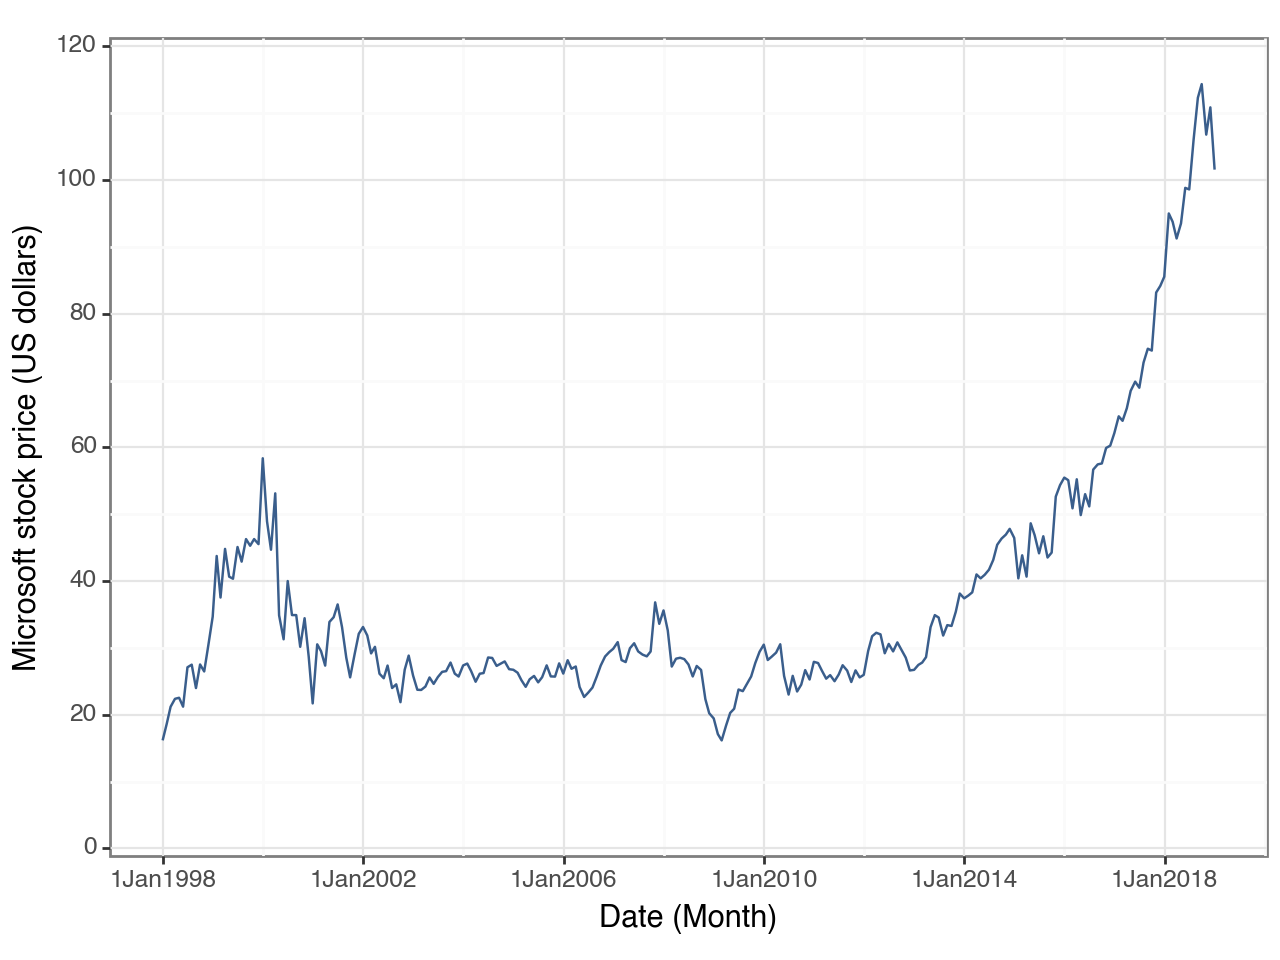

<Figure Size: (640 x 480)>

In [36]:
(
    ggplot(data_monthly)
    + geom_line(aes("date", "p_MSFT"), color=color[0], size=0.5)
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 120], breaks=seq(0, 120, 20))
    + scale_x_date(breaks=breaks(limits)[::2], labels=date_format("1%b%Y"))
    + labs(y="Microsoft stock price (US dollars)", x="Date (Month)")
    + theme_bw()
)


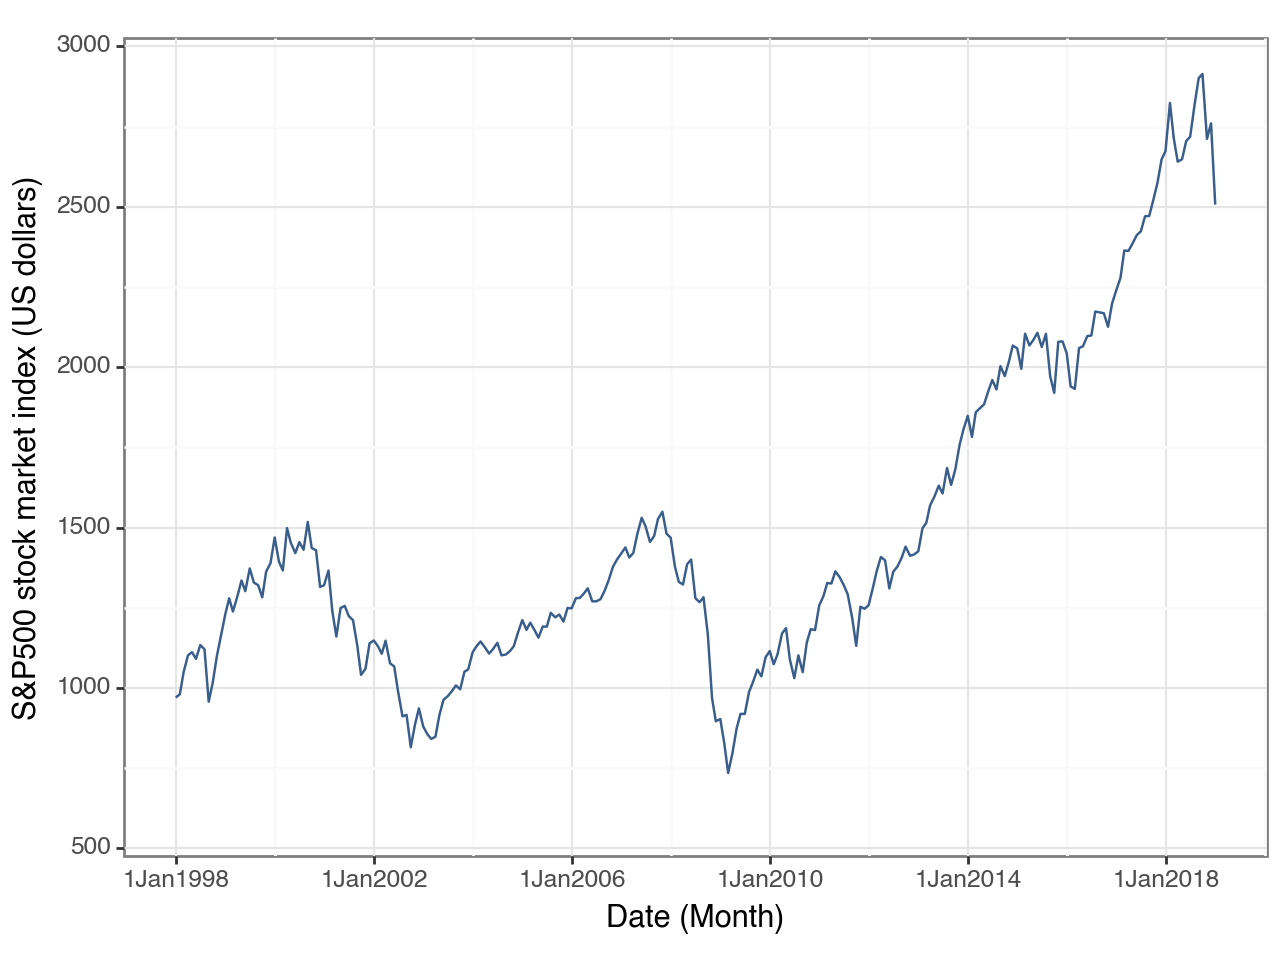

<Figure Size: (640 x 480)>

In [37]:
(
    ggplot(data_monthly)
    + geom_line(aes("date", "p_SP500"), color=color[0], size=0.5)
    + scale_y_continuous(
        expand=[0.01, 0.01], limits=[500, 3000], breaks=seq(500, 3000, 500)
    )
    + scale_x_date(breaks=breaks(limits)[::2], labels=date_format("1%b%Y"))
    + labs(y="S&P500 stock market index (US dollars)", x="Date (Month)")
    + theme_bw()
)


In [38]:
print(PhillipsPerron(data_daily["p_MSFT"], lags=32, test_type="rho", trend="n"))
print(PhillipsPerron(data_daily["p_MSFT"], lags=32, test_type="rho", trend="c"))
print(PhillipsPerron(data_daily["p_MSFT"], lags=32, test_type="rho", trend="ct"))


     Phillips-Perron Test (Z-rho)    
Test Statistic                  2.287
P-value                         0.994
Lags                               32
-------------------------------------

Trend: No Trend
Critical Values: -13.24 (1%), -7.79 (5%), -5.54 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                  2.245
P-value                         0.998
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -20.60 (1%), -14.08 (5%), -11.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -0.092
P-value                         0.995
Lags                               32
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.31 (1%),

In [39]:
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="n"))
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="c"))
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="ct"))


     Phillips-Perron Test (Z-rho)    
Test Statistic                  0.908
P-value                         0.892
Lags                               32
-------------------------------------

Trend: No Trend
Critical Values: -13.24 (1%), -7.79 (5%), -5.54 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -0.292
P-value                         0.940
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -20.60 (1%), -14.08 (5%), -11.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -3.943
P-value                         0.894
Lags                               32
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.31 (1%),

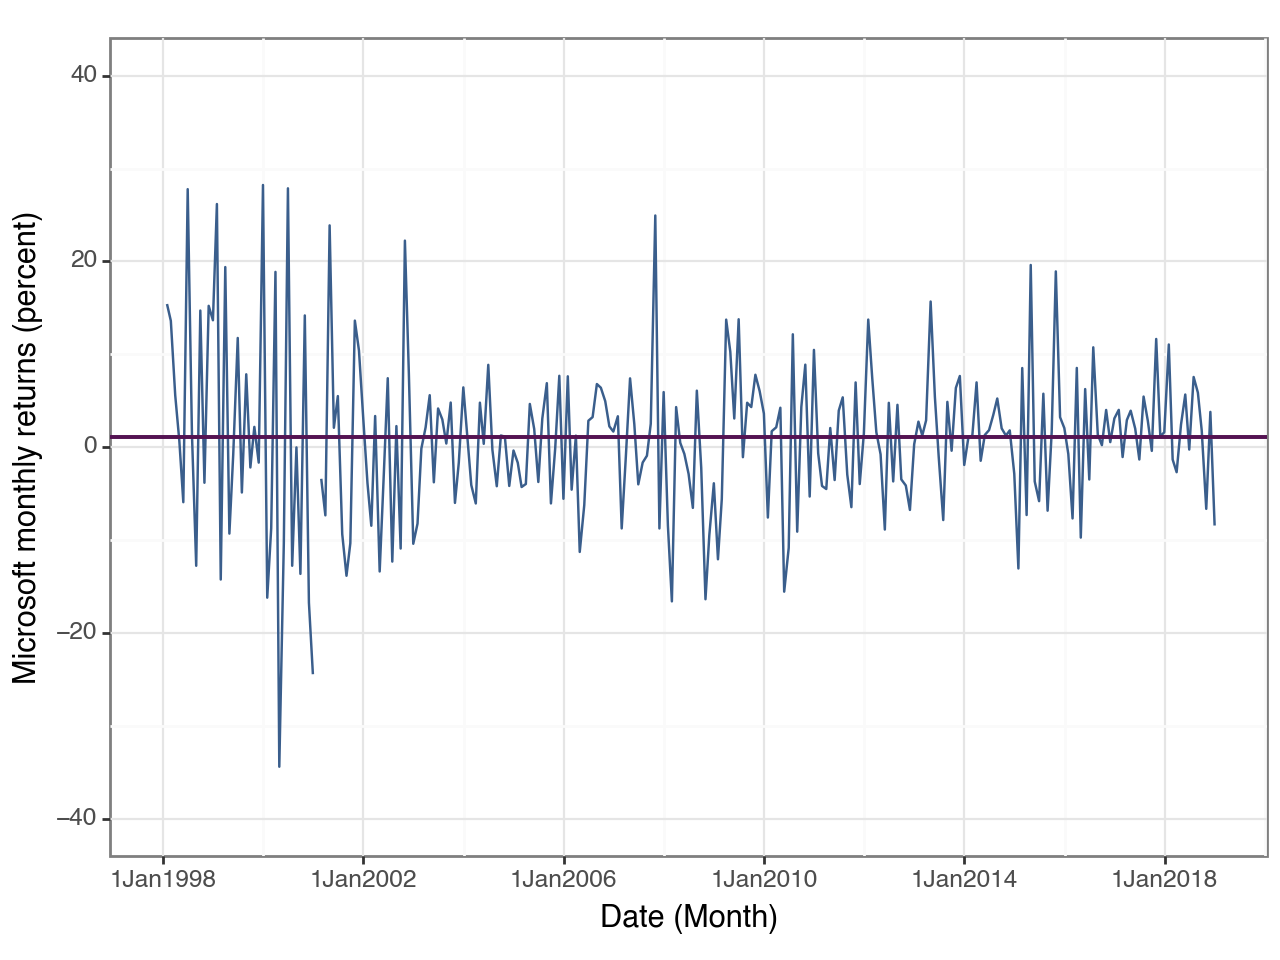

<Figure Size: (640 x 480)>

In [40]:
(
    ggplot(data_monthly)
    + geom_line(aes("date", "PctRetMSFT"), color=color[0], size=0.5)
    + scale_x_date(breaks=breaks(limits)[::2], labels=date_format("1%b%Y"))
    + geom_hline(yintercept=1.13, color=color[2], size=0.8)
    + labs(y="Microsoft monthly returns (percent)", x="Date (Month)")
    + ylim(-40, 40)
    + theme_bw()
)


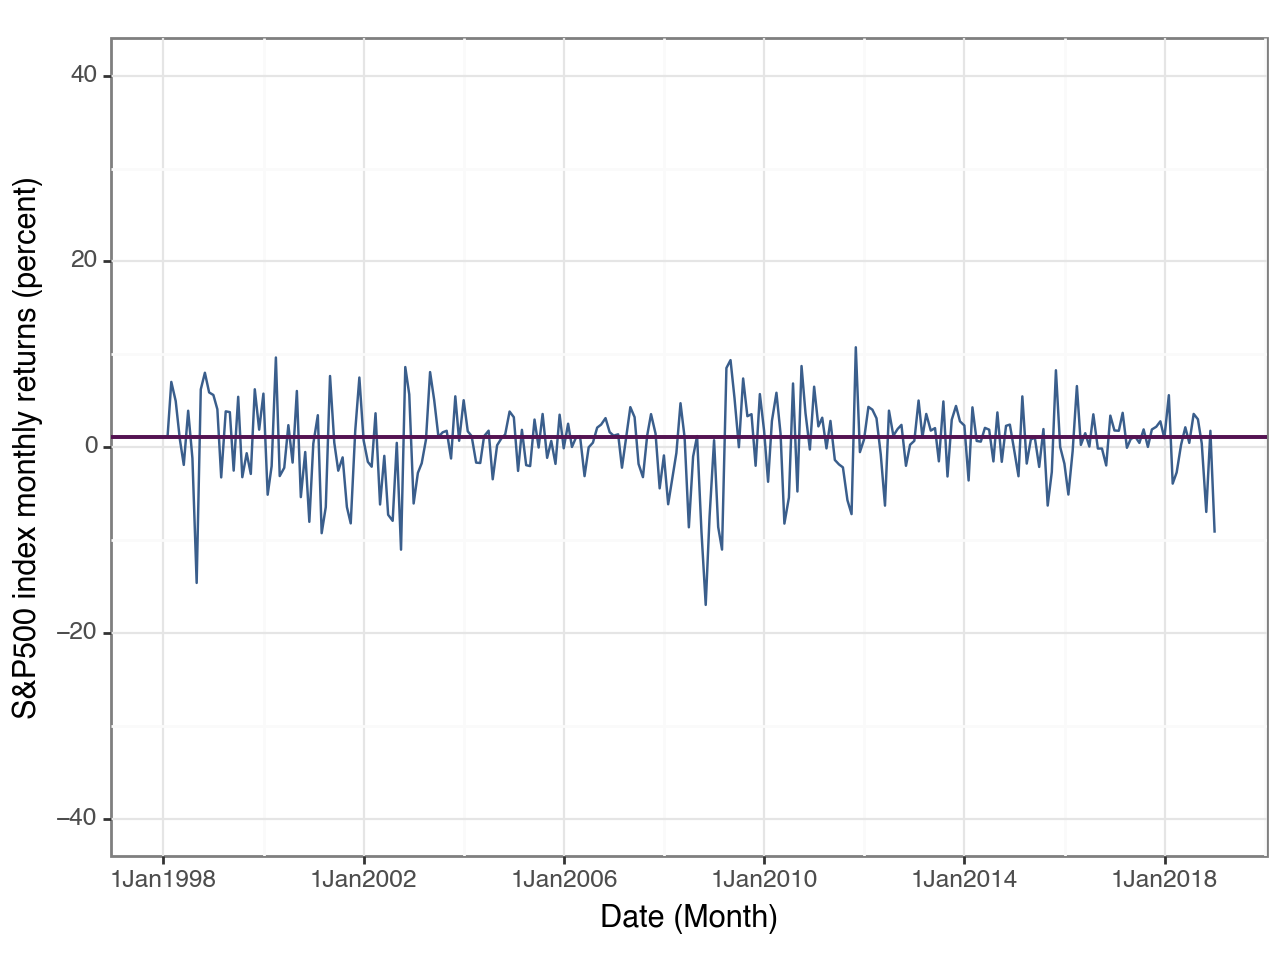

<Figure Size: (640 x 480)>

In [41]:
(
    ggplot(data_monthly)
    + geom_line(aes("date", "PctRetSP500"), color=color[0], size=0.5)
    + scale_x_date(breaks=breaks(limits)[::2], labels=date_format("1%b%Y"))
    + geom_hline(yintercept=1.13, color=color[2], size=0.8)
    + labs(y="S&P500 index monthly returns (percent)", x="Date (Month)")
    + ylim(-40, 40)
    + theme_bw()
)


In [42]:
data_monthly.head(2)


,date,year,month,p_SP500,p_MSFT,l.p_MSFT,l.p_SP500,d.p_MSFT,d.p_SP500,PctRetMSFT,PctRetSP500,d.lnp_MSFT,d.lnp_SP500
0,1997-12-31,1997,12,970.429993,16.156250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-01-30,1998,1,980.280029,18.648438,16.15625,970.429993,2.492188,9.850036,15.425535,1.015018,0.143455,0.010099


In [43]:
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetMSFT"], lags=5, test_type="rho", trend="n"
    )
)
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetMSFT"], lags=5, test_type="rho", trend="c"
    )
)
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetMSFT"], lags=5, test_type="rho", trend="ct"
    )
)


     Phillips-Perron Test (Z-rho)    
Test Statistic               -285.235
P-value                         0.000
Lags                                5
-------------------------------------

Trend: No Trend
Critical Values: -12.12 (1%), -7.03 (5%), -4.96 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic               -280.444
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -20.16 (1%), -13.86 (5%), -11.10 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic               -280.268
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -28.45 (1%),

In [44]:
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetSP500"], lags=5, test_type="rho", trend="n"
    )
)
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetSP500"], lags=5, test_type="rho", trend="c"
    )
)
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetSP500"], lags=5, test_type="rho", trend="ct"
    )
)


     Phillips-Perron Test (Z-rho)    
Test Statistic               -234.376
P-value                         0.000
Lags                                5
-------------------------------------

Trend: No Trend
Critical Values: -12.12 (1%), -7.03 (5%), -4.96 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic               -233.937
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -20.16 (1%), -13.86 (5%), -11.10 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic               -233.518
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -28.45 (1%),

### Table 12.1 Descriptive statistics on monthly returns

In [45]:
results = (
    data_monthly[["PctRetMSFT", "PctRetSP500"]]
    .describe()
    .T[["min", "max", "mean", "std", "count"]]
    .rename(columns={"std": "sd", "count": "N"})
)
results.index = ["Monthly returns on Microsoft (%)", "Monthly returns on S&P500 (%)"]
results.round(1)


,min,max,mean,sd,N
Monthly returns on Microsoft (%),-34.4,40.8,1.1,9.1,252.0
Monthly returns on S&P500 (%),-16.9,10.8,0.5,4.3,252.0


In [46]:
reg1 = pf.feols("PctRetMSFT ~ PctRetSP500", data=data_monthly, vcov="HC1")
reg2 = pf.feols(
    "d_lnp_MSFT ~ d_lnp_SP500",
    data=data_monthly.rename(
        columns={"d.lnp_MSFT": "d_lnp_MSFT", "d.lnp_SP500": "d_lnp_SP500"}
    ),
    vcov="HC1",
)
reg3 = pf.feols("PctRetMSFT ~ PctRetSP500", data=data_daily, vcov="HC1")
reg4 = pf.feols(
    "d_lnp_MSFT ~ d_lnp_SP500",
    data=data_daily.rename(
        columns={"d.lnp_MSFT": "d_lnp_MSFT", "d.lnp_SP500": "d_lnp_SP500"}
    ),
    vcov="HC1",
)

### Table 12.2 Returns on Microsoft and market returns: Simple regression results

In [47]:
pf.etable(
    [reg1],
    labels={
        "PctRetSP500": "S&P500 returns",
        "Intercept": "Constant",
    },
    model_heads=["Microsoft returns"],
    head_order="h",
    show_se_type=False,
    digits=2,
)

GT(_tbl_data=  level_0         level_1                    0
0    coef  S&P500 returns  1.26*** <br> (0.10)
1    coef        Constant     0.54 <br> (0.45)
2   stats    Observations                  252
3   stats   R<sup>2</sup>                 0.36, _body=<great_tables._gt_data.Body object at 0x14fe764b0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x14b1ba7b0>, _spanners=Spanners([SpannerInfo(spanner_id='Microsoft returns', spanner_level=1, spanner_label='Microsoft returns', spanner_units=None, spanner_pattern=None, vars=['0'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=[''], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x14fe75640>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True

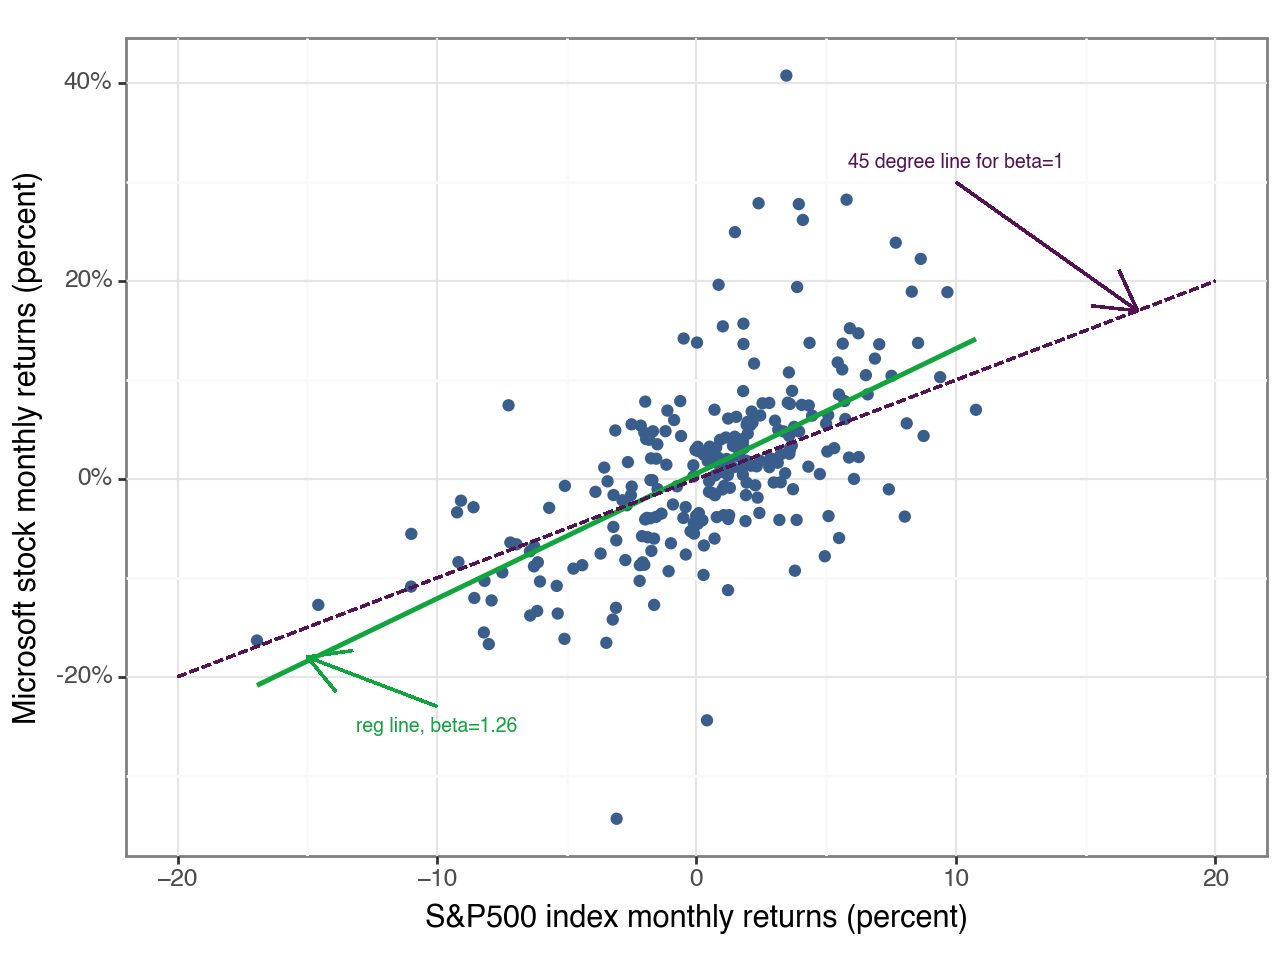

<Figure Size: (640 x 480)>

In [48]:
(
    ggplot(data_monthly, aes(x="PctRetSP500", y="PctRetMSFT / 100"))
    + geom_point(color=color[0])
    + geom_smooth(method="lm", se=False, color=color[1])
    + labs(
        x="S&P500 index monthly returns (percent)",
        y="Microsoft stock monthly returns (percent)",
    )
    + scale_y_continuous(labels=percent_format())
    + theme_bw()
    + geom_segment(
        aes(x=-20, y=-0.2, xend=20, yend=0.2),
        color=color[2],
        size=0.5,
        linetype="dashed",
    )
    + geom_segment(aes(x=10, y=0.3, xend=17, yend=0.17), color=color[2], arrow=arrow())
    + annotate(
        "text", x=10, y=0.32, size=7, label="45 degree line for beta=1", color=color[2]
    )
    + geom_segment(
        aes(x=-10, y=-0.23, xend=-15, yend=-0.18), color=color[1], arrow=arrow()
    )
    + annotate(
        "text", x=-10, y=-0.25, size=7, color=color[1], label="reg line, beta=1.26"
    )
)

In [49]:
data_monthly_tidy = pd.melt(
    data_monthly[["date", "PctRetMSFT", "PctRetSP500"]],
    id_vars=["date"],
    var_name="index",
    value_name="pct_return",
)


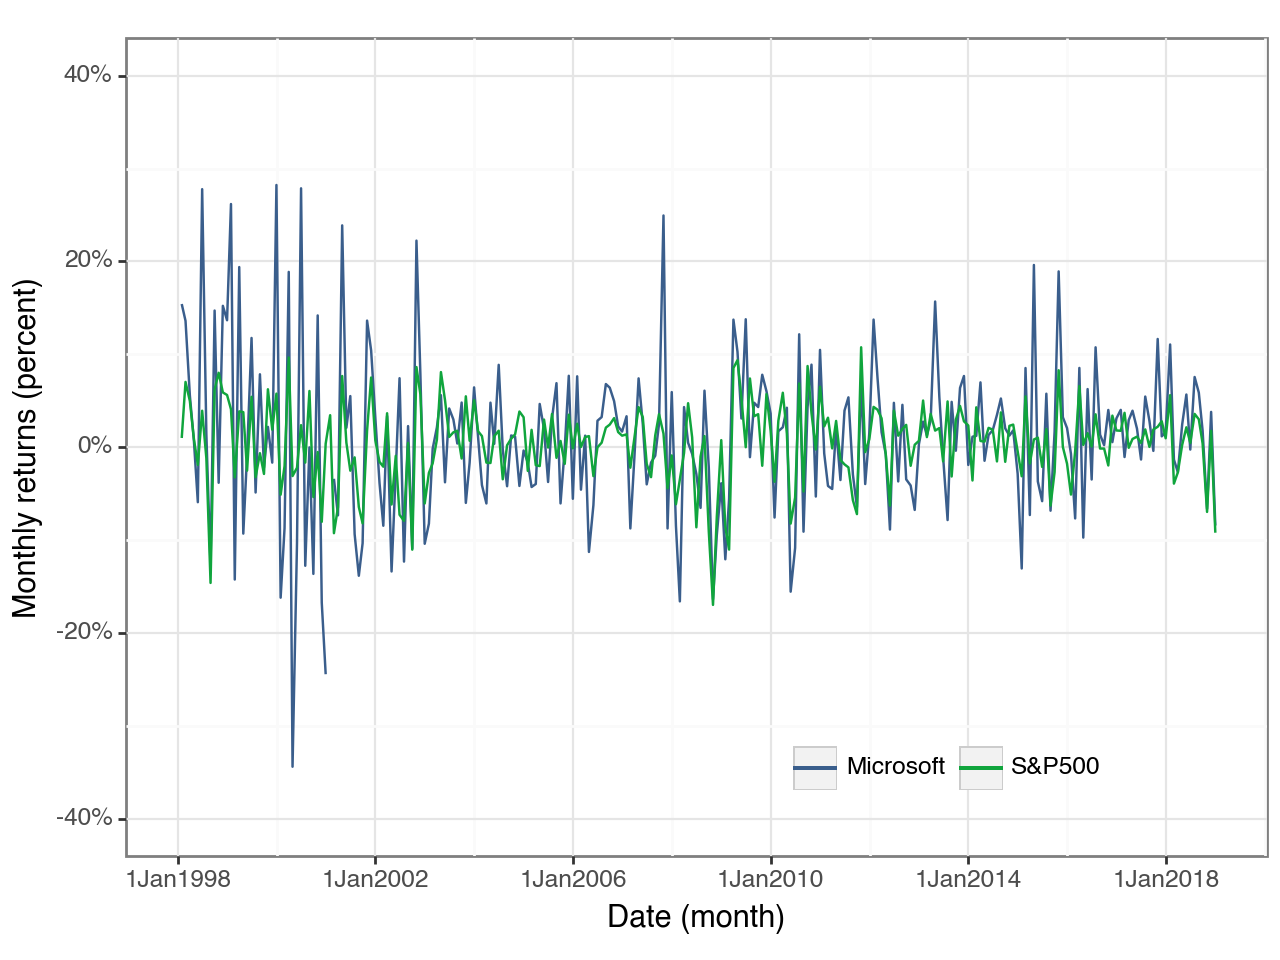

<Figure Size: (640 x 480)>

In [50]:
(
    ggplot(data_monthly_tidy)
    + geom_line(aes(x="date", y="pct_return / 100", color="index"), size=0.5)
    + scale_color_manual(
        name="", values=[color[0], color[1]], labels=["Microsoft", "S&P500"]
    )
    + labs(x="Date (month)", y="Monthly returns (percent)")
    + scale_y_continuous(limits=(-0.40, 0.40), labels=percent_format())
    + scale_x_date(breaks=breaks(limits)[::2], labels=date_format("1%b%Y"))
    + theme_bw()
    + theme(
        legend_position=(0.74, 0.2),
        legend_direction="horizontal",
        legend_background=element_blank(),
        legend_title=element_blank()
    )
)

In [51]:
data_monthly_tidy_17_18 = data_monthly_tidy.loc[
    data_monthly_tidy["date"] > "2017-01-01"
]

In [52]:
breaks = date_breaks('6 month')
limits = datetime(2017, 1, 1), datetime(2019, 1, 1)

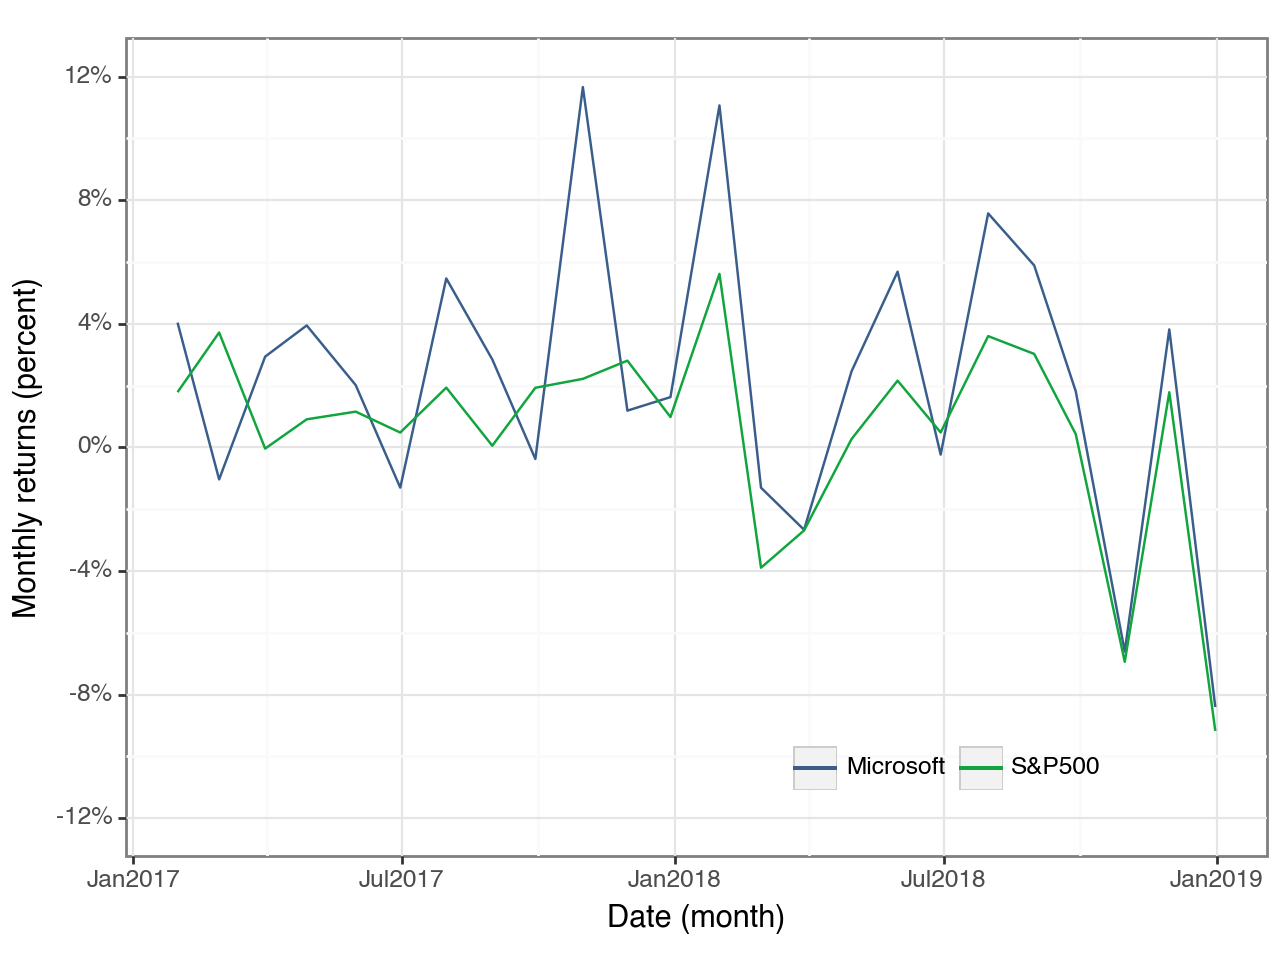

<Figure Size: (640 x 480)>

In [53]:
(
    ggplot(data_monthly_tidy_17_18.reset_index())
    + geom_line(aes(x="date", y="pct_return / 100", color="index"), size=0.5)
    + scale_color_manual(
        name="", values=[color[0], color[1]], labels=["Microsoft", "S&P500"]
    )
    + labs(x="Date (month)", y="Monthly returns (percent)")
    + scale_y_continuous(
        expand=[0.01, 0.01],
        limits=[-0.12, 0.12],
        breaks=seq(-0.12, 0.12, 0.04),
        labels=percent_format(),
    )
    + scale_x_date(breaks=breaks(limits), labels=date_format("%b%Y"))
    + theme_bw()
    + theme(
        legend_position=(0.74, 0.2),
        legend_direction="horizontal",
        legend_background=element_blank(),
        legend_title=element_blank(),
    )
)

### Table 12.3 Returns on Microsoft and market returns: alternative measurements

In [54]:
pf.etable(
    [reg1, reg2, reg3, reg4],
    labels={
        "PctRetSP500": "S&P500 returns",
        "d_lnp_SP500": "S&P500 returns",
        "Intercept": "Constant",
    },
    model_heads=[
        "Monthly pct change",
        "Monthly log change",
        "Daily pct change",
        "Daily log change",
    ],
    head_order="h",
    show_se_type=False,
    digits=4,
)

GT(_tbl_data=  level_0         level_1                        0                        1  \
0    coef  S&P500 returns  1.2636*** <br> (0.1030)                            
1    coef  S&P500 returns                           1.2403*** <br> (0.1003)   
2    coef        Constant     0.5396 <br> (0.4529)     0.0026 <br> (0.0045)   
3   stats    Observations                      252                      252   
4   stats   R<sup>2</sup>                   0.3573                   0.3627   

                         2                        3  
0  1.1000*** <br> (0.0243)                           
1                           1.0951*** <br> (0.0236)  
2     0.0266 <br> (0.0202)     0.0002 <br> (0.0002)  
3                     5283                     5283  
4                   0.4492                   0.4465  , _body=<great_tables._gt_data.Body object at 0x161123fb0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='3', type=<ColInfoTypeEnum.default: 1>, column_label='(4)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x1612a0740>, _spanners=Spanners([SpannerInfo(spanner_id='Monthly pct change', spanner_level=1, spanner_label='Monthly pct change', spanner_units=None, spanner_pattern=None, vars=['0'], built=None), SpannerInfo(spanner_id='Monthly log change', spanner_level=1, spanner_label='Monthly log change', spanner_units=None, spanner_pattern=None, vars=['1'], built=None), SpannerInfo(spanner_id='Daily pct change', spanner_level=1, spanner_label='Daily pct change', spanner_units=None, spanner_pattern=None, vars=['2'], built=None), SpannerInfo(spanner_id='Daily log change', spanner_level=1, spanner_label='Daily log change', spanner_units=None, spanner_pattern=None, vars=['3'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=[''], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x1612a0e60>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='t